## ECE495 In-class Exercise 1: Deep Neural Networks

This ICE uses TensorFlow's Keras to:

1. Load a prebuilt dataset.
2. Build a simple neural network that classifies images.
3. Train the neural network.
4. Evaluate the accuracy of the network.

#### Set up

**Ensure you are using your [495 Virtual Environment](https://github.com/kaitlin-fair/495venv_setup) before you begin!**  
  
If you are using your virtual environment, when you run this section you should see that you are using TensorFlow version 2.10.1.
  
Import TensorFlow and other libraries into your program to get started:

In [8]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

TensorFlow version: 2.10.1


## Load a dataset

Load and prepare the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). The pixel values of the images range from 0 through 255. For this network, we want to scale these values to a range of 0 to 1 (i.e. normalize the values) by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers.

<style>
    .questioncolor {
        background-color: #906752;
    }
</style>

<div class="questioncolor">

This is the first section you are required to edit!
1. Grab the dataset from tf.keras. [Look here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) to see the different datasets that TensorFlow Keras has at the ready and find commands to load the dataset. Replace `???` with the correct command on the first line. If you look further in TensorFlow documentation, you may see that there are other ways to call the MNIST dataset. It will be easiest within this notebook to use the command that begins with `tf.keras`.
2. Normalize the pixel values of the entire dataset. Replace the appropriate `???` to do so.

</div>

In [9]:
(train_images, train_labels), (test_images, test_labels) = (
    tf.keras.datasets.mnist.load_data()
)

# Normalize values to be between 0 and 1
# tried to normalize by dividing
train_images = train_images / 255.0  # will normalize the data
test_images = test_images / 255.0

## Explore the Data

Once you've run the above section, a "Variables" tab will show in the toolbar of this notebook.  You should see:

*   There are 60,000 images in the training set
*   Each training image is 28x28 pixels
*   For each training image, there is an associated label (i.e. 60,000 labels)
*   There are 10,000 images in the test set
*   Each test image is 28x28 pixels
*   For each test image, there is an associated label (i.e. 10,000 labels)
*   The labels for each image are the values written in the image: 0, 1, 2, ... 9
*   The dataset is NOT in order.


<style>
    .questioncolor {
        background-color: #906752;
    }
</style>

<div class="questioncolor">

You can also write Python commands to display this data which can be helpful when you are not using a Jupyter Notebook. To practice, write a command(s) to ensure you correctly normalized your dataset (i.e. your pixel values are within 0 and 1). Take a look [here](https://numpy.org/doc/stable/reference/generated/numpy.matrix.max.html) and [here](https://numpy.org/doc/stable/reference/generated/numpy.matrix.min.html) as an idea for one possible way to do so. Write your commands in the block below. You can look at [details](https://www.w3schools.com/python/ref_func_print.asp) on how to use the `print` command to display data.

</div>

In [10]:
# use python to display the max value so you know that none of the
# weights are higher than one.

test_images_variable = test_images.max()
train_images_variable = train_images.max()

print("Max val of test data:", test_images_variable)
print("Max val of training images data:", train_images_variable)

Max val of test data: 1.0
Max val of training images data: 1.0


View some of the training data

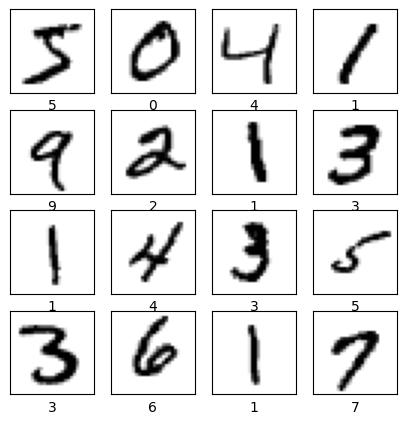

In [11]:
plt.figure(figsize=(5, 5))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

View some of the test data



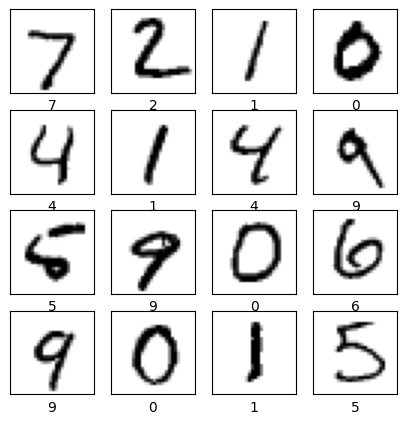

In [12]:
plt.figure(figsize=(5, 5))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

## Build a machine learning model

### Set up the layers
The basic building block of a neural network is the [layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers have parameters (such as weights and biases) that are learned during training.

For this network, we will build a [sequential model](https://www.tensorflow.org/guide/keras/sequential_model) with the following layers (in order):
1. Flatten
2. Dense
3. Dropout
4. Dense

Sequential models are useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor (tensors are kind of like arrays). This is exactly how our layers will work: we will have input arrays and output arrays for each layer.

For the first layer in this network, we want to use a flatten layer transform the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data. The input shape will be the only required argument for the first layer of your model.

After the pixels are flattened, the next layer of the network is a dense layer. This is a densely connected, or fully connected, neural layer. The first Dense layer will need to have 128 nodes (or neurons) with a "reLu" activation. The number of nodes and type of activation will be the two arguments required for the second layer of your model.

The first dense layer is followed by a dropout layer. Dropout layers randomly set input units to 0 with a particular frequency of `rate` at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - `rate`) such that the sum over all inputs is unchanged.  Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. Adding a dropout layer can prevent overfitting. The layer command does the math for you, but the rate we will set is 0.2. The rate will be the only required argument for the third layer of your model.

The dropout layer is followed by another dense layer (also the last layer of the network). This layer returns a logits array (unnormalized log probabilities) with a length equivalent to the number of classes in your dataset. Each node contains a score that indicates the current image belongs to one of the classes. The number of nodes will be the only argument required for the final layer of your model.

<style>
    .questioncolor {
        background-color: #906752;
    }
</style>

<div class="questioncolor">

Given the above information, build your model by adding the appropriate layers in place of the four `???` lines (leave the commas!). Be sure to view the hyperlinks in the last section - especially those for layers and sequential models - they will be very helpful in calling your layers correctly.

</div>

In [13]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10),
    ]
)

## Compile your model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

[Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function. For this model we will use the **Adam optimization**, which is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

[Loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. For this model, we will use the **Sparse Categorical Crossentropy** loss to compute the crossentropy loss between the labels and predictions.

[Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — This is what is used to monitor the training and testing steps. For this model, we will use **accuracy** computed by the fraction of the images that are correctly classified. The accuracy metric calculates how often predictions equal labels.

<style>
    .questioncolor {
        background-color: #906752;
    }
</style>

<div class="questioncolor">

Compile your model by replacing the three `???` with the correct optimizer, loss function, and metric type. Be sure to view the hyperlinks to ensure correct syntax.

</div>

In [14]:
model.compile(
    optimizer="Adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

## Train and evaluate your model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

See [TensorFlow's Keras model documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model) to aid in implementing the above steps. Note that you can shift through the methods(examples: `fit`, `evaluate`) using the right hand column of the webpage.

<style>
    .questioncolor {
        background-color: #906752;
    }
</style>

<div class="questioncolor">

To train your network, call the `model.fit` method — so called because it "fits" the model to the [training data set](https://developers.google.com/machine-learning/glossary#training_set) by adjusting your model parameters and minimizing the loss. Do so using the training data and 5 epochs, resulting in only three input arguments. This will complete the first two steps in training your neural network.

</div>

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3009 - accuracy: 0.9119
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1435 - accuracy: 0.9564
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0920 - accuracy: 0.9718
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9755


As the model trains, the loss and accuracy metrics are displayed. This model should reach an accuracy of about 0.98 (or 98%) on the training data.

<style>
    .questioncolor {
        background-color: #906752;
    }
</style>

<div class="questioncolor">

To complete the last two steps of the training process, use the `model.evaluate` method to check your model's performance. This is typically performed on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or\n [test set](https://developers.google.com/machine-learning/glossary#test-set). Choose verbose=2 and note what that means (maybe even try out verbose=1). This will result in only three input arguments.

</div>

In [16]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.0739 - accuracy: 0.9771 - 1s/epoch - 3ms/step


[0.07389779388904572, 0.9771000146865845]

You have now verified that the image classifier is trained to ~98% accuracy on this dataset.

## Make Predictions

Adding a softmax layer will convert the logits output of the final layer to more intuitive probability values. You may also hear this referred to as a "confidence value" since the softmax (and DNN) output array represents the model's "confidence" that the image corresponds to each of the 10 different digits.

Note: It is possible to bake a softmax function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.



<style>
    .questioncolor {
        background-color: #906752;
    }
</style>

<div class="questioncolor">

Return to the resource page on TensorFlow [layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) to understand how to add a Softmax layer. Replace the `???` with the correct code. This layer will not require any input arguments. _Note that you are appending a layer after training our original `model` using brackets_ to create another deep neural network model to perform inference (i.e. determine the class of a new input image based on a trained model).

</div>

In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

Run the test data through the trained DNN.

<style>
    .questioncolor {
        background-color: #906752;
    }
</style>

<div class="questioncolor">

Return to the resource page on TensorFlow Keras [models](https://www.tensorflow.org/api_docs/python/tf/keras/model) to understand how to predict using your new neural network called `probability_model`. Your only input argument will be your test images and the output of this line of code will be an array of labels called `predictions`. Replace the `???` to make that happen. 

</div>

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Each DNN output node (remember: there is 1 for each class) will display the probability that the image falls within a class. The label with the highest confidence value is the prediction from the DNN for a particular image. The sum of all output probability values should be 1 or very close to it. 


<style>
    .questioncolor {
        background-color: #906752;
    }
</style>

<div class="questioncolor">

Verify that all probability values (one per class) of one image are between 0 and 1 and that the sum of said values is equal to 1. Then determine which class your neural network believes the image belongs to based on the highest probability. [Print](https://www.w3schools.com/python/ref_func_print.asp) all of this data. Choose any image! The examples on [this page](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) may be helpful in determining that the probability values of one image are equal to 1. You can take a look at [this page](https://www.statology.org/numpy-get-row/) to understand how to look at particular values in a matrix. Also, recall you can easily view your variables within a Jupyter notebook to understand the matrix dimensions of your prediction data.

</div>

In [23]:
print("The chance of getting a single image", predictions[10])
print(predictions[10].sum())

The chance of getting a single image [9.9996603e-01 1.6997098e-10 2.6511094e-05 2.2674365e-07 1.4120584e-09
 3.4065777e-06 9.5403948e-07 1.6507465e-06 5.7777100e-08 1.2718178e-06]
1.0000001


## Analyze Results

We can use a package called `sklearn` (installed during your virtual environment setup) to look at the performance of our network class by class. For this exercise, the only data we really care about is the _precision_ (i.e. how often predictions equal labels). Take note of which labels don't do as well as others and think through why that might be (hint: this would be a really good concept to takeaway from this ICE).

In [20]:
from sklearn.metrics import classification_report

predictions2 = np.argmax(predictions, axis=1)

rpt = classification_report(test_labels, predictions2)
print(rpt)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Next up, we want to visualize some of our results. We will set up custom plotting functions (no need to edit) and take a look at a few images.

In [24]:
# setup plotting functions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label, 100 * np.max(predictions_array), true_label
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

The custom plotting functions denote correct prediction labels in blue (i.e. that image was classified correctly), incorrect prediction labels in red (i.e. that image was classified incorrectly), and confidence scores in between in gray (i.e. the neural network thought the image might be a different class but not enough to declare it as such). The percentage listed in each image gives the confidence (out of 100) that the network has that the image is the final predicted label.

This visualization may help you in thinking through why some labels (digits) don't get classified as well as others.

Also note that if you rerun this entire code without reprogramming anything, your results may change! Consider why this might be as well.

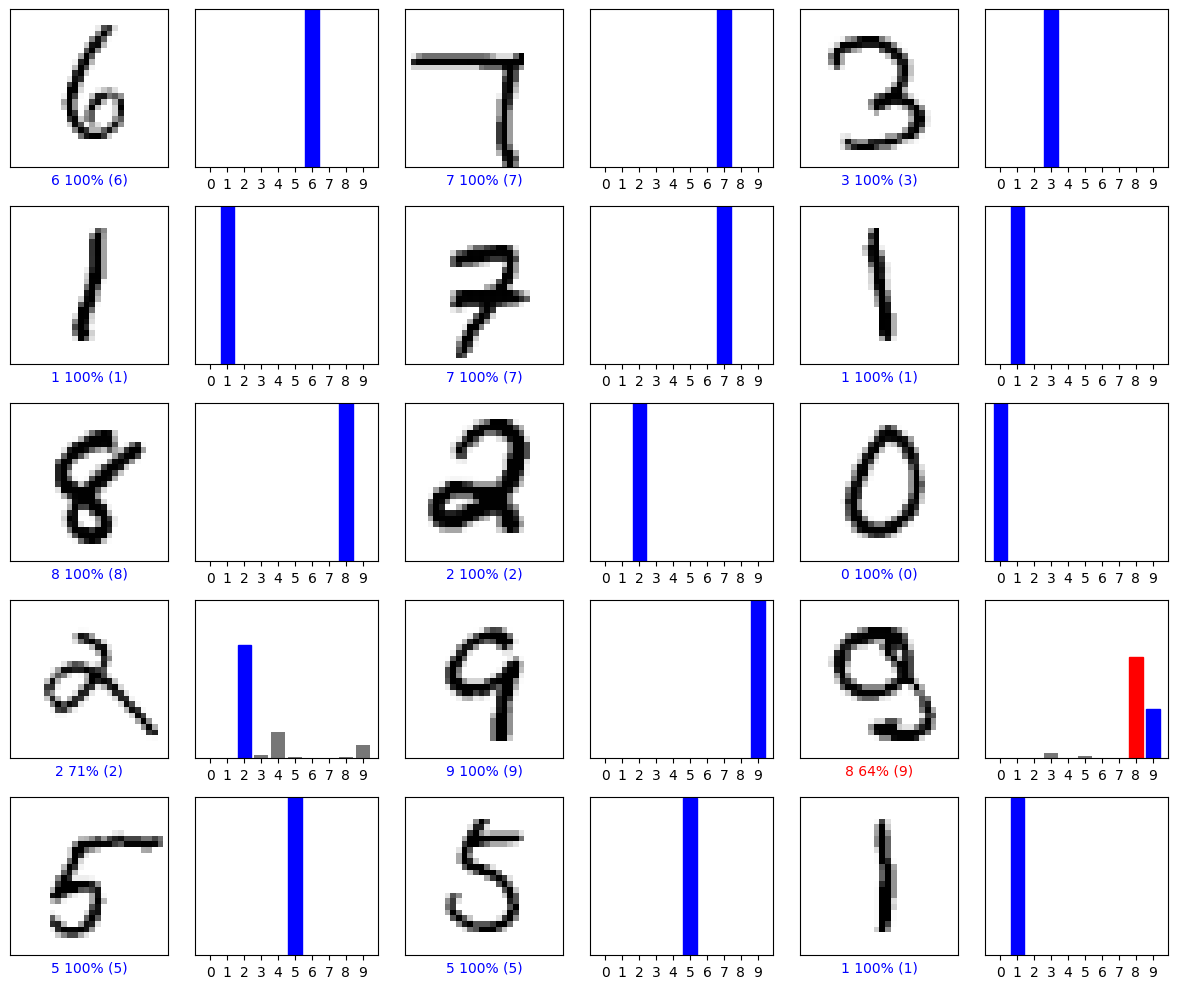

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
k = 0
for i in range(140, 155):
    plt.subplot(num_rows, 2 * num_cols, 2 * k + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * k + 2)
    plot_value_array(i, predictions[i], test_labels)
    k = k + 1
plt.tight_layout()
plt.show()